In [1]:
import numpy as np
import lightcones
import math
import lightcones as lc
import lightcones.linalg as la
import matplotlib.pyplot as plt
from lightcones.linalg import mv
from lightcones import models
from lightcones.solvers.schrodinger import solve
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

n_sites = 101
e = 2
h = 0.5
es = [e]*n_sites
hs = [h]*(n_sites-1)
n_i=10

Для частицы локализованной узле $n_i$ посчитаем функцию Вигнера
$$\rho = \ket{n_i}\bra{n_i}$$
$$
	W(m,k)= \sum_{n=-\infty}^{n=+\infty} \frac{1}{2 \pi} \bra{n}\ket{n_i}\bra{n_i}\ket{m-n} e^{-ik(2n-m)} =\delta_{m, 2n_i}
$$

In [27]:
#Для частицы на узле n_i
def wigner(n_sites, k,e,h):
    
    nk = len(k)
    ns=n_sites
    rho_w = np.zeros((ns, ns), dtype=complex)
    rho_w[n_i, n_i] = 1.0
 # |n_i><n_i|

    #for i in range(ns):
        #for j in range(2*ns):
            #if j == i:
                #rho_w[i, j] = e
            #elif j == i - 1 or j == i + 1:
                #rho_w[i, j] = h
            #else:
                #rho_w[i, j] = 0

    w_ = np.zeros((nk, 2*ns), dtype = complex)

    for m in range(2*ns):
        for n in range(ns):
            n1 = n
            n2 = m - n
            if 0 <= n2 < ns:
                for p, k_val in enumerate(k):
                    w_[p, m] += rho_w[n1, n2] * np.exp(-1j * k_val * (2*n - m))
    w_ /= (2 * np.pi)
    return w_


In [28]:
k = np.arange(0, math.pi, 0.01)
w_p = wigner(n_sites, k,e,h)

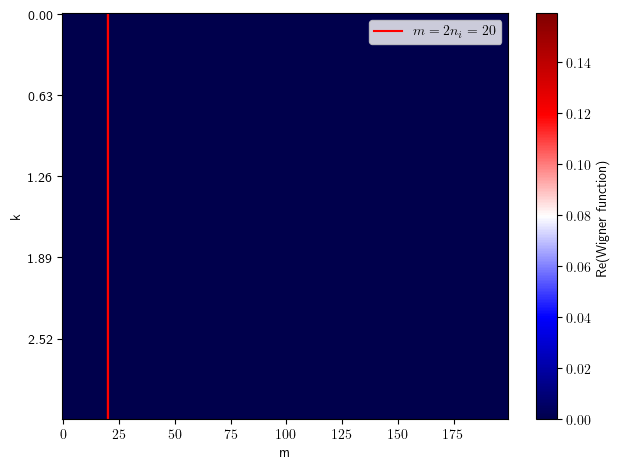

In [ ]:
max_ = np.max(np.abs(w_p[:]))
min_ = -max_

im = plt.imshow(w_p[:, :2*n_sites].real, aspect='auto', cmap='seismic', vmin=min_, vmax=max_)

plt.xlabel('m')
plt.ylabel('k')

plt.yticks(
    [len(k)/5 * i for i in range(5)],
    labels=["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)]
)
plt.axvline(x=2*n_i, color='red', linestyle='-', label=f'$m = 2n_i = {2*n_i}$')
plt.legend()
# 🎨 Добавляем colorbar
cbar = plt.colorbar(im)
cbar.set_label('Re(Wigner function)')

plt.tight_layout()
plt.show()
#plt.savefig('pictures/memory_t0.eps', format='eps')

Выходит дельта функция, но не на узле $n_i$, а на узле $2n_i$.

Аналогично построим для плоской волны с импульсом $q$:
\begin{equation}
	\ket{\psi} = \ket{q} = \sum_{n=-\infty}^{n=+\infty} e^{i n q }\ket{n}
\end{equation}
Вспомним равенство: 
\begin{equation}
	\sum_{k=-\infty}^{k=+\infty} e^{2 \pi i k t } = \sum_{n=-\infty}^{n=+\infty} \delta (n-t)
\end{equation}
$$
	\hat{ \rho } =  \sum_n \sum_m	e^{i q (n-m)}\ket{n}\bra{m}\\
	\bra{n'} \hat{\rho} \ket{m'-n'} =  \sum_n \sum_m	e^{i q (n-m)}\delta_{n,n'}\delta_{m,m'-n'}=\\
	= \sum_m e^{i q (n-m)} \delta_{m'-m,n'} = e^{i q (2n'-m')} \\
	W(m',k) = \sum_{n'} e^{-i k (2 n' - m ')} e^{i q (2n' - m')} = e^{- i m' (q-k)} \sum_{n'} e^{i 2 n'(q-k)} =  e^{- i m' (q-k) }\sum_{r} \delta(r-\frac{q-k}{\pi}) 
$$

In [33]:
def wigner(n_sites, k, q):
    nk = len(k)
    ns = n_sites
    rho = np.zeros((ns, ns), dtype=complex)

    # Построение плотностной матрицы |q><q|
    for n in range(ns):
        for m in range(ns):
            rho[n, m] = np.exp(1j * q * (n - m))

    # Вычисление функции Вигнера
    w_ = np.zeros((nk, 2*ns), dtype=complex)
    for m in range(2*ns):
        for n in range(ns):
            n1 = n
            n2 = m - n
            if 0 <= n2 < ns:
                for p, k_val in enumerate(k):
                    w_[p, m] += rho[n1, n2] * np.exp(-1j * k_val * (2*n - m))
    w_ /= (2 * np.pi)
    return w_

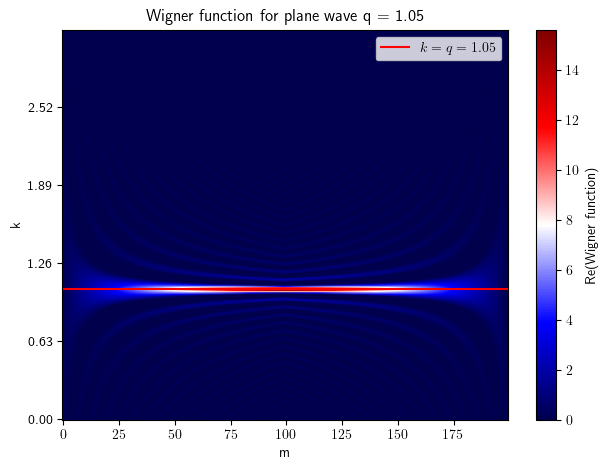

In [ ]:
q = np.pi / 3  # импульс плоской волны
k = np.linspace(0, np.pi, 300)

w_p = wigner(n_sites, k, q)

max_ = np.max(np.abs(w_p[:]))
min_ = -max_

im = plt.imshow(w_p[:, :2*n_sites].real, aspect='auto', cmap='seismic', vmin=min_, vmax=max_,origin="lower")
plt.xlabel('m')
plt.ylabel('k')

plt.yticks(
    [len(k)/5 * i for i in range(5)],
    labels=["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)]
)
# Найдём индекс, соответствующий k = q
k_index = np.argmin(np.abs(k - q))  # или q = np.pi / 3

plt.axhline(y=k_index, color='red', linestyle='-', label=f'$k = q = {q:.2f}$')
plt.legend()
# 🎨 Добавляем colorbar
cbar = plt.colorbar(im)
cbar.set_label('Re(Wigner function)')
plt.title(f'Wigner function for plane wave q = {q:.2f}')
plt.tight_layout()
plt.show()
#plt.savefig('pictures/memory_t0.eps', format='eps')

Рассмотрим одночастичный гамильтониан на цепочке
\begin{equation}
H_{n,m} \;=\; e\,\delta_{n,m} \;+\; h\,(\delta_{n,m+1}+\delta_{n,m-1}),
\qquad n,m\in\{0,1,2,\dots\}.
\end{equation}

\begin{equation}
W_H(m,k) \;=\; \frac{1}{2\pi}\sum_{n} e^{-ik(2n-m)}\,H_{n,\,m-n}.
\end{equation}



Подстановка диагональной части даёт
\begin{equation}
H_{n,m-n}^{(\text{diag})}=e\,\delta_{n,m-n}
\quad\Rightarrow\quad n=\frac{m}{2}.
\end{equation}
Это возможно только при чётных $m$ и даёт
\begin{equation}
W_{\text{diag}}(m,k)=
\begin{cases}
\dfrac{e}{2\pi}, & m \text{ чётное},\\[6pt]
0, & m \text{ нечётное}.
\end{cases}
\end{equation}



\begin{equation}
H_{n,m-n}^{(\text{hop})}=h\,\delta_{n,\,m-n+1}+h\,\delta_{n,\,m-n-1}.
\end{equation}
Первое условие даёт $2n=m+1\Rightarrow n=\frac{m+1}{2}$ и $2n-m=1$,
второе $2n=m-1\Rightarrow n=\frac{m-1}{2}$ и $2n-m=-1$.
Оба существуют только при нечётных $m$, следовательно
\begin{equation}
W_{\text{hop}}(m,k)=
\begin{cases}
\dfrac{h}{\pi}\,\cos k, & m \text{ нечётное},\\[6pt]
0, & m \text{ чётное}.
\end{cases}
\end{equation}


Для бесконечной цепочки:
\begin{equation}
W_H(m,k)=
\begin{cases}
\dfrac{e}{2\pi}, & m \text{ чётное},\\[6pt]
\dfrac{h}{\pi}\cos k, & m \text{ нечётное},\\[6pt]
0, & \text{иначе}.
\end{cases}
\end{equation}

Для трёхдиагонального гамельтониана построим $H_w$

In [62]:
def wigner(n_sites, k,e,h):
    
    nk = len(k)
    ns=n_sites
    
    """"
     Матрица гамильтониана для полубесконечной цепочки,
    усечённой до узлов 0..N (размер (N+1)x(N+1)).
    """
    H = np.zeros((ns, ns), dtype=complex)
    # Диагональ
    np.fill_diagonal(H, e)
    # Связи между соседями
    for n in range(ns-1):
        H[n, n+1] = h
        H[n+1, n] = h


    w_ = np.zeros((nk, 2*ns), dtype = complex)

    for m in range(2*ns):
        for n in range(ns):
            n1 = n
            n2 = m - n
            if 0 <= n2 < ns:
                for p, k_val in enumerate(k):
                    w_[p, m] += H[n1, n2] * np.exp(-1j * k_val * (2*n - m))
    w_ /= (2 * np.pi)
    return w_

In [63]:
k = np.arange(0, math.pi, 0.01)
w_p = wigner(n_sites, k,e,h)

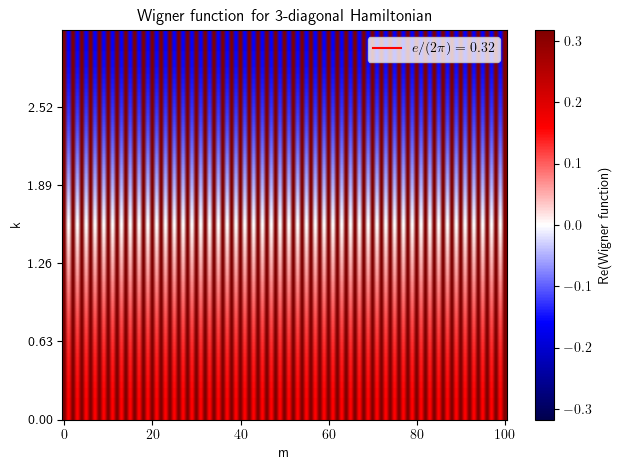

In [70]:
max_ = np.max(np.abs(w_p[:]))
min_ = -max_

im = plt.imshow(w_p[:, :n_sites].real, aspect='auto', cmap='seismic', vmin=min_, vmax=max_,origin="lower")
plt.plot([], [], color='red', linestyle='-', label=f'$ e/(2\\pi)= {e/(2*np.pi):.2f}$')
plt.legend()
plt.xlabel('m')
plt.ylabel('k')

plt.yticks(
    [len(k)/5 * i for i in range(5)],
    labels=["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)]
)
plt.title('Wigner function for 3-diagonal Hamiltonian')
# 🎨 Добавляем colorbar
cbar = plt.colorbar(im)
cbar.set_label('Re(Wigner function)')

plt.tight_layout()
plt.show()
#plt.savefig('pictures/memory_t0.eps', format='eps')

Построим ф.Вигнера от Гамельтониана немного иначе, как тут https://arxiv.org/pdf/hep-lat/0010002
Работает только для $N_{site} = odd$.
\begin{equation}
	H_w(m,k) = \frac{1}{2s+1}\sum_{h=-s}^{s} e^{(i \frac{4 \pi}{2s+1} h k)}\bra{m-h} \hat{H} \ket{m+h}
\end{equation}

In [40]:
def build_hamiltonian(n_sites, e, h):
    """
    Трёхдиагональный гамильтониан для цепочки из n_sites узлов.
    Диагональ = e, соседние связи = h.
    """
    H = np.zeros((n_sites, n_sites), dtype=complex)
    # Диагональ
    np.fill_diagonal(H, e)
    # Соседние связи
    for n in range(n_sites - 1):
        H[n, n+1] = h
        H[n+1, n] = h
    return H

In [41]:
print(build_hamiltonian(n_sites, e, h))

[[2. +0.j 0.5+0.j 0. +0.j ... 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 2. +0.j 0.5+0.j ... 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0.5+0.j 2. +0.j ... 0. +0.j 0. +0.j 0. +0.j]
 ...
 [0. +0.j 0. +0.j 0. +0.j ... 2. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j ... 0.5+0.j 2. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j ... 0. +0.j 0.5+0.j 2. +0.j]]


In [42]:
def wigner_discrete(H, k_vals):
    """
    Дискретная функция Вигнера по формуле:
    H_w(m,k) = (1/(2s+1)) * sum_{h=-s}^s exp(i * 4π/(2s+1) * h * k) * <m-h|H|m+h>
    
    Parameters
    ----------
    H : np.ndarray
        Гамильтониан (ns x ns)
    k_vals : array_like
        Сетка по k (например, np.arange(ns))
    
    Returns
    -------
    H_w : np.ndarray
        Массив формы (len(k_vals), ns)
    """
    ns = H.shape[0]
    s = (ns - 1) // 2   # предполагаем нечётное число узлов
    nk = len(k_vals)
    
    H_w = np.zeros((nk, ns), dtype=complex)
    
    for m in range(ns):
        for h in range(-s, s+1):
            m_minus = m - h
            m_plus  = m + h
            if 0 <= m_minus < ns and 0 <= m_plus < ns:
                phase = np.exp(1j * (4*np.pi/(2*s+1)) * h * k_vals)
                H_w[:, m] += H[m_minus, m_plus] * phase
        H_w[:, m] /= (2*s+1)
    
    return H_w

In [43]:
k = np.arange(0, math.pi, 0.01)

# Строим гамильтониан
H = build_hamiltonian(n_sites, e, h)

# Считаем функцию Вигнера
w_p = wigner_discrete(H, k)

print("H shape:", H.shape)
print("H_w shape:", w_p.shape)
print(np.array2string(w_p.real, precision=3, suppress_small=True))

H shape: (100, 100)
H_w shape: (315, 100)
[[0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]]


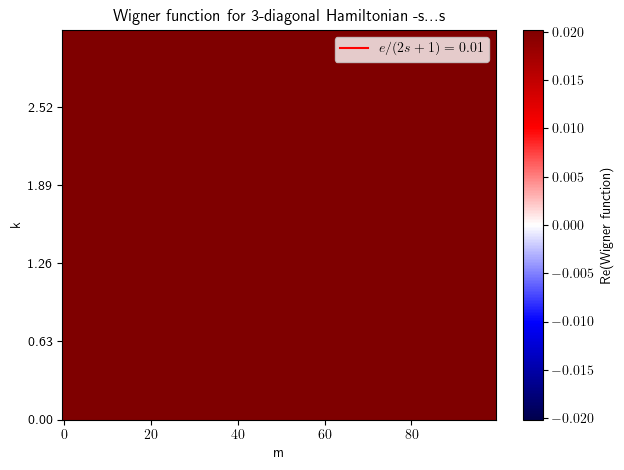

In [44]:
max_ = np.max(np.abs(w_p))
min_ = -max_

im = plt.imshow(w_p[:, :n_sites].real, aspect='auto', cmap='seismic', vmin=min_, vmax=max_,origin="lower")
plt.plot([], [], color='red', linestyle='-', label=f'$ e/(2s+1)= {e/(2*n_sites+1):.2f}$')
plt.legend()
plt.xlabel('m')
plt.ylabel('k')

plt.yticks(
    [len(k)/5 * i for i in range(5)],
    labels=["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)]
)
plt.title('Wigner function for 3-diagonal Hamiltonian -s...s')
# 🎨 Добавляем colorbar
cbar = plt.colorbar(im)
cbar.set_label('Re(Wigner function)')


plt.tight_layout()
plt.show()
#plt.savefig('pictures/memory_t0.eps', format='eps')

Плохая ф.Вигнера, сплошная константа! 

Попробуем разядить систему, сделать замену 2h = h'
\begin{equation}
	H_w(m,k) = \frac{1}{2s+1}\sum_{h=-2s}^{2s} e^{(i \frac{2 \pi}{2s+1} h k)}\bra{m-h/2} \hat{H} \ket{m+h/2}
\end{equation}

In [103]:
n_sites = 100
def build_hamiltonian(n_sites, e, h):
    """
    Трёхдиагональный гамильтониан для цепочки из n_sites узлов.
    Диагональ = e, соседние связи = h.
    """
    n_s = n_sites *2 
    H = np.zeros((n_s, n_s), dtype=complex)
    # Диагональ
    for n in range(n_s//2):
        H[2*n, 2*n] = e
    # Соседние связи
    for n in range(n_s//2-1):
        H[2*n, 2*n+2] = h
        H[2*n+2, 2*n] = h
    return H
print(build_hamiltonian(n_sites, e, h))

[[2. +0.j 0. +0.j 0.5+0.j ... 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j ... 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 2. +0.j ... 0. +0.j 0. +0.j 0. +0.j]
 ...
 [0. +0.j 0. +0.j 0. +0.j ... 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j ... 0. +0.j 2. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j ... 0. +0.j 0. +0.j 0. +0.j]]


Вот получился разряженый гамельтониан, взаимодействие только между чётными узлами 

In [ ]:
import numpy as np

def wigner_discrete(H, k_vals):
 
    N = H.shape[0]
    k_vals = np.asarray(k_vals)
    nk = k_vals.size

    W = np.zeros((nk, N), dtype=complex)

    for m in range(N):
        for d in range(-(N-1), N):
            # индексы m±d/2 должны быть целыми
            if (m - d/2).is_integer() and (m + d/2).is_integer():
                i = int(m - d/2)
                j = int(m + d/2)
                if 0 <= i < N and 0 <= j < N:
                    # теперь k — физический волновой вектор
                    phase = np.exp(1j * np.outer(k_vals, [d]))
                    W[:, m] += H[i, j] * phase[:, 0]
        W[:, m] /= N
    return W

In [105]:
k = np.arange(0, math.pi, 0.01)

# Строим гамильтониан
H = build_hamiltonian(n_sites, e, h)

# Считаем функцию Вигнера
w_p = wigner_discrete(H, k)

print("H shape:", H.shape)
print("H_w shape:", w_p.shape)
print(np.array2string(w_p.real, precision=3, suppress_small=True))

H shape: (200, 200)
H_w shape: (315, 200)
[[0.01  0.005 0.01  ... 0.005 0.01  0.   ]
 [0.01  0.005 0.01  ... 0.005 0.01  0.   ]
 [0.01  0.005 0.01  ... 0.005 0.01  0.   ]
 ...
 [0.01  0.005 0.01  ... 0.005 0.01  0.   ]
 [0.01  0.005 0.01  ... 0.005 0.01  0.   ]
 [0.01  0.005 0.01  ... 0.005 0.01  0.   ]]


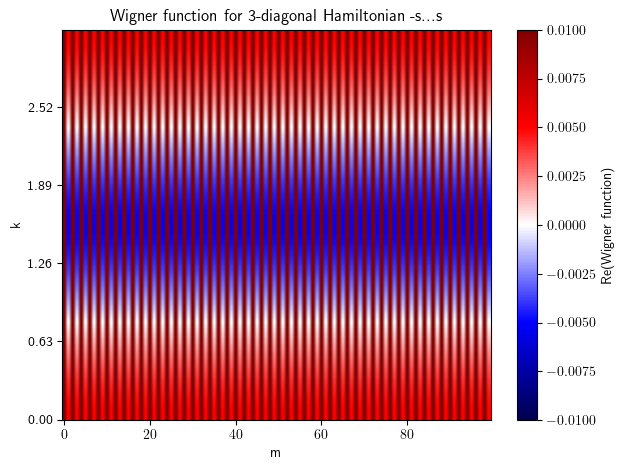

In [107]:
# все индексы 
max_ = np.max(np.abs(w_p))
min_ = -max_

im = plt.imshow(w_p[:, :n_sites].real, aspect='auto', cmap='seismic', vmin=min_, vmax=max_,origin="lower")
#plt.plot([], [], color='red', linestyle='-', label=f'$ e/(2s+1)= {e/(2*n_sites+1):.2f}$')
#plt.legend()
plt.xlabel('m')
plt.ylabel('k')

plt.yticks(
    [len(k)/5 * i for i in range(5)],
    labels=["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)]
)
plt.title('Wigner function for 3-diagonal Hamiltonian -s...s')
# 🎨 Добавляем colorbar
cbar = plt.colorbar(im)
cbar.set_label('Re(Wigner function)')


plt.tight_layout()
plt.show()
#plt.savefig('pictures/memory_t0.eps', format='eps')

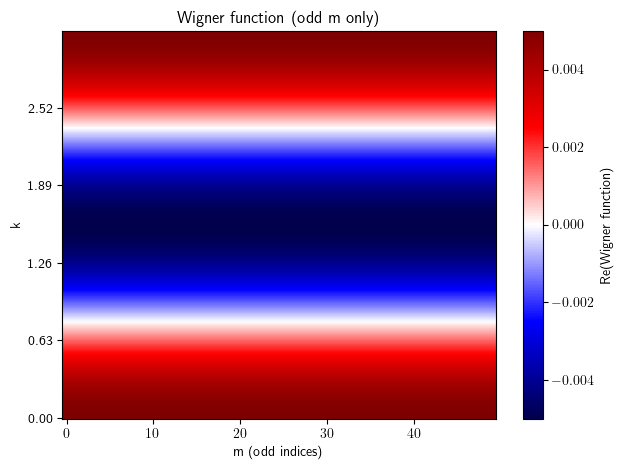

In [109]:
# Берём только нечётные m
odd_indices = np.arange(1, n_sites, 2)   # 1,3,5,... (физические узлы)

# Строим картинку только по ним
max_ = np.max(np.abs(w_p[:, odd_indices]))
min_ = -max_

im = plt.imshow(
    w_p[:, odd_indices].real,
    aspect='auto',
    cmap='seismic',
    vmin=min_,
    vmax=max_,
    origin="lower"
)

plt.xlabel('m (odd indices)')
plt.ylabel('k')

plt.yticks(
    [len(k)/5 * i for i in range(5)],
    labels=["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)]
)

plt.title('Wigner function (odd m only)')
cbar = plt.colorbar(im)
cbar.set_label('Re(Wigner function)')

plt.tight_layout()
plt.show()

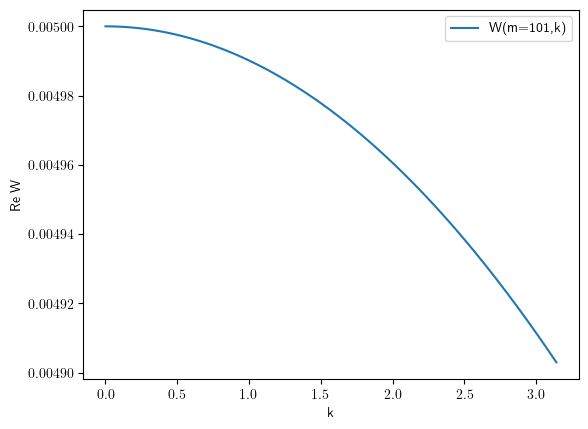

In [ ]:
m0 = n_sites+1  # возму нечётный фикированный узел, посмотрю, что на нём
plt.plot(k, w_p[:, m0].real, label=f"W(m={m0},k)")
plt.xlabel("k")
plt.ylabel("Re W")
plt.legend()
plt.show()